In [45]:
import pandas as pd
import os
import sys
import importlib
sys.path.append("../scripts/")
import regex_maven
import rq_aux
import matplotlib.pyplot as plt
importlib.reload(regex_maven)
importlib.reload(rq_aux)
 #"small", "medium", "large"
sizes1 = rq_aux.sizes1

#"all", "small", "medium", "large"
sizes2 = rq_aux.sizes2 

In [46]:
regex = regex_maven
analysis_output = "figures"
os.makedirs(analysis_output, exist_ok=True)

plugins = regex.plugins
categories = regex.categories
categories_short = regex.categories_short
build_tool = "maven"
noerror = True
output_path = "../data/output_data/"
#overview_dataset = f"{output_path}overview_daylight_noerror.csv"
#alltasks_dataset = f"{output_path}all_tasks_noerror.csv"

overview_dataset = f"{output_path}overview_cloc2_noerror.csv"
alltasks_dataset = f"{output_path}all_tasks_cloc2_noerror.csv"

In [47]:
rq_aux.check_categories(regex)

In [48]:
df = rq_aux.read_all_tasks(alltasks_dataset, build_tool, noerror)

Tasks With Error: Removed 0 workflows: 183355 -> 183355
Build tool maven = 137333


In [49]:
tasks_energy_category = {}
tasks_energy_category['all'] = rq_aux.field_by_cat(df, 'energy', plugins, categories)

for x in sizes1:
    tasks_energy_category[x] = rq_aux.field_by_cat(df[df["size"] == x], 'energy', plugins, categories)

In [50]:
tasks_time_category = {}
tasks_time_category['all'] = rq_aux.field_by_cat(df, 'seconds', plugins, categories)

for x in sizes1:
    tasks_time_category[x] = rq_aux.field_by_cat(df[df["size"] == x], 'seconds', plugins, categories)

In [51]:
tasks_power_category = {}
tasks_power_category['all'] = rq_aux.power_by_cat(df, plugins, categories)

for x in sizes1:
    tasks_power_category[x] = rq_aux.power_by_cat(df[df["size"] == x], plugins, categories)

In [52]:
total_energy = 0
total_power = 0
for x in sizes1:
  for key, value in tasks_energy_category[x].items():
    total_energy += len(value)
    
  for key, value in tasks_power_category[x].items():
    total_power += len(value)

assert total_energy == len(df)
assert total_power == len(df)

In [53]:
total_energy = 0
total_power = 0
for key, value in tasks_energy_category['all'].items():
    print(key, len(value))
    total_energy += len(value)
    
for key, value in tasks_power_category['all'].items():
    print(key, len(value))
    total_power += len(value)


assert total_energy == len(df)
assert total_power == len(df)

Integration Test 589
Unit Test 8470
Compile 37431
Documentation 4597
Install 6559
Linter 18259
Packaging 23200
Others 31764
Unclassified 6464
Integration Test 589
Unit Test 8470
Compile 37431
Documentation 4597
Install 6559
Linter 18259
Packaging 23200
Others 31764
Unclassified 6464


In [54]:
rq_aux.calc_category_kruskall_mwu(tasks_time_category['all'])

Category: Integration Test, N: 589, median: 346916.000
Category: Unit Test, N: 8470, median: 2238970.500
Category: Compile, N: 37431, median: 556429.000
Category: Documentation, N: 4597, median: 1249203.000
Category: Install, N: 6559, median: 148601.000
Category: Linter, N: 18259, median: 276529.000
Category: Packaging, N: 23200, median: 125022.000
Category: Others, N: 31764, median: 114540.000
Category: Unclassified, N: 6464, median: 223670.500

Cats for Kruskall:  f['Integration Test', 'Unit Test', 'Compile', 'Documentation', 'Install', 'Linter', 'Packaging', 'Others', 'Unclassified']
Discarded category: f[]

KruskalResult(statistic=22913.852301737345, pvalue=0.0)
Integration Test x Integration Test: EQUAL
Integration Test x Unit Test: Cliff small (-0.314)
Integration Test x Compile: EQUAL
Integration Test x Documentation: Cliff small (-0.192)
Integration Test x Install: Cliff small (0.204)
Integration Test x Linter: Cliff negligible (0.112)
Integration Test x Packaging: Cliff small 

In [55]:
rq_aux.calc_category_kruskall_mwu(tasks_energy_category['all'])

Category: Integration Test, N: 589, median: 15.669
Category: Unit Test, N: 8470, median: 59.351
Category: Compile, N: 37431, median: 16.613
Category: Documentation, N: 4597, median: 32.664
Category: Install, N: 6559, median: 6.478
Category: Linter, N: 18259, median: 12.288
Category: Packaging, N: 23200, median: 5.528
Category: Others, N: 31764, median: 4.243
Category: Unclassified, N: 6464, median: 11.749

Cats for Kruskall:  f['Integration Test', 'Unit Test', 'Compile', 'Documentation', 'Install', 'Linter', 'Packaging', 'Others', 'Unclassified']
Discarded category: f[]

KruskalResult(statistic=21413.813389003466, pvalue=0.0)
Integration Test x Integration Test: EQUAL
Integration Test x Unit Test: Cliff medium (-0.342)
Integration Test x Compile: EQUAL
Integration Test x Documentation: Cliff small (-0.239)
Integration Test x Install: Cliff small (0.266)
Integration Test x Linter: Cliff negligible (0.142)
Integration Test x Packaging: Cliff small (0.319)
Integration Test x Others: Cliff

In [56]:
rq_aux.calc_category_kruskall_mwu(tasks_power_category['all'])

Category: Integration Test, N: 589, median: 0.031
Category: Unit Test, N: 8470, median: 0.028
Category: Compile, N: 37431, median: 0.031
Category: Documentation, N: 4597, median: 0.031
Category: Install, N: 6559, median: 0.035
Category: Linter, N: 18259, median: 0.032
Category: Packaging, N: 23200, median: 0.040
Category: Others, N: 31764, median: 0.039
Category: Unclassified, N: 6464, median: 0.034

Cats for Kruskall:  f['Integration Test', 'Unit Test', 'Compile', 'Documentation', 'Install', 'Linter', 'Packaging', 'Others', 'Unclassified']
Discarded category: f[]

KruskalResult(statistic=5049.499475254278, pvalue=0.0)
Integration Test x Integration Test: EQUAL
Integration Test x Unit Test: Cliff negligible (0.110)
Integration Test x Compile: EQUAL
Integration Test x Documentation: EQUAL
Integration Test x Install: Cliff negligible (-0.062)
Integration Test x Linter: EQUAL
Integration Test x Packaging: Cliff small (-0.157)
Integration Test x Others: Cliff negligible (-0.147)
Integratio

In [57]:
rq_aux.calc_category_kruskall_mwu(tasks_energy_category['small'])

Category: Integration Test, N: 2, median: 212.888
Category: Unit Test, N: 780, median: 71.160
Category: Compile, N: 1894, median: 16.418
Category: Documentation, N: 296, median: 44.719
Category: Install, N: 119, median: 10.180
Category: Linter, N: 672, median: 7.437
Category: Packaging, N: 1139, median: 6.349
Category: Others, N: 2513, median: 3.843
Category: Unclassified, N: 319, median: 17.088

Cats for Kruskall:  f['Unit Test', 'Compile', 'Documentation', 'Install', 'Linter', 'Packaging', 'Others', 'Unclassified']
Discarded category: f['Integration Test']

KruskalResult(statistic=1468.42297281816, pvalue=0.0)
Unit Test x Unit Test: EQUAL
Unit Test x Compile: Cliff large (0.520)
Unit Test x Documentation: Cliff small (0.165)
Unit Test x Install: Cliff large (0.639)
Unit Test x Linter: Cliff large (0.543)
Unit Test x Packaging: Cliff large (0.705)
Unit Test x Others: Cliff large (0.711)
Unit Test x Unclassified: Cliff medium (0.456)

Compile x Unit Test: Cliff large (-0.520)
Compile x

In [58]:
rq_aux.calc_category_kruskall_mwu(tasks_power_category['small'])

Category: Integration Test, N: 2, median: 0.008
Category: Unit Test, N: 780, median: 0.029
Category: Compile, N: 1894, median: 0.034
Category: Documentation, N: 296, median: 0.028
Category: Install, N: 119, median: 0.041
Category: Linter, N: 672, median: 0.039
Category: Packaging, N: 1139, median: 0.043
Category: Others, N: 2513, median: 0.040
Category: Unclassified, N: 319, median: 0.034

Cats for Kruskall:  f['Unit Test', 'Compile', 'Documentation', 'Install', 'Linter', 'Packaging', 'Others', 'Unclassified']
Discarded category: f['Integration Test']

KruskalResult(statistic=457.78692237719224, pvalue=9.44253559001558e-95)
Unit Test x Unit Test: EQUAL
Unit Test x Compile: Cliff small (-0.305)
Unit Test x Documentation: EQUAL
Unit Test x Install: Cliff medium (-0.373)
Unit Test x Linter: Cliff medium (-0.349)
Unit Test x Packaging: Cliff medium (-0.429)
Unit Test x Others: Cliff medium (-0.386)
Unit Test x Unclassified: Cliff small (-0.264)

Compile x Unit Test: Cliff small (0.305)
Com

In [59]:
rq_aux.calc_category_kruskall_mwu(tasks_energy_category['medium'])

Category: Integration Test, N: 267, median: 26.680
Category: Unit Test, N: 3638, median: 47.334
Category: Compile, N: 13792, median: 16.164
Category: Documentation, N: 2437, median: 33.116
Category: Install, N: 2295, median: 6.779
Category: Linter, N: 4480, median: 6.286
Category: Packaging, N: 8096, median: 6.098
Category: Others, N: 12136, median: 3.880
Category: Unclassified, N: 2822, median: 9.728

Cats for Kruskall:  f['Integration Test', 'Unit Test', 'Compile', 'Documentation', 'Install', 'Linter', 'Packaging', 'Others', 'Unclassified']
Discarded category: f[]

KruskalResult(statistic=8034.62416375738, pvalue=0.0)
Integration Test x Integration Test: EQUAL
Integration Test x Unit Test: Cliff small (-0.166)
Integration Test x Compile: Cliff small (0.195)
Integration Test x Documentation: Cliff negligible (-0.099)
Integration Test x Install: Cliff medium (0.402)
Integration Test x Linter: Cliff medium (0.426)
Integration Test x Packaging: Cliff large (0.487)
Integration Test x Othe

In [60]:
rq_aux.calc_category_kruskall_mwu(tasks_power_category['medium'])

Category: Integration Test, N: 267, median: 0.026
Category: Unit Test, N: 3638, median: 0.029
Category: Compile, N: 13792, median: 0.033
Category: Documentation, N: 2437, median: 0.031
Category: Install, N: 2295, median: 0.038
Category: Linter, N: 4480, median: 0.040
Category: Packaging, N: 8096, median: 0.043
Category: Others, N: 12136, median: 0.039
Category: Unclassified, N: 2822, median: 0.036

Cats for Kruskall:  f['Integration Test', 'Unit Test', 'Compile', 'Documentation', 'Install', 'Linter', 'Packaging', 'Others', 'Unclassified']
Discarded category: f[]

KruskalResult(statistic=2594.859292739105, pvalue=0.0)
Integration Test x Integration Test: EQUAL
Integration Test x Unit Test: EQUAL
Integration Test x Compile: Cliff small (-0.212)
Integration Test x Documentation: Cliff negligible (-0.116)
Integration Test x Install: Cliff small (-0.243)
Integration Test x Linter: Cliff small (-0.314)
Integration Test x Packaging: Cliff medium (-0.341)
Integration Test x Others: Cliff small

In [61]:
rq_aux.calc_category_kruskall_mwu(tasks_energy_category['large'])

Category: Integration Test, N: 320, median: 10.228
Category: Unit Test, N: 4052, median: 67.552
Category: Compile, N: 21745, median: 17.062
Category: Documentation, N: 1864, median: 30.595
Category: Install, N: 4145, median: 6.133
Category: Linter, N: 13107, median: 12.969
Category: Packaging, N: 13965, median: 5.200
Category: Others, N: 17115, median: 4.547
Category: Unclassified, N: 3323, median: 11.753

Cats for Kruskall:  f['Integration Test', 'Unit Test', 'Compile', 'Documentation', 'Install', 'Linter', 'Packaging', 'Others', 'Unclassified']
Discarded category: f[]

KruskalResult(statistic=12665.972527990461, pvalue=0.0)
Integration Test x Integration Test: EQUAL
Integration Test x Unit Test: Cliff medium (-0.471)
Integration Test x Compile: Cliff small (-0.251)
Integration Test x Documentation: Cliff small (-0.302)
Integration Test x Install: Cliff negligible (0.145)
Integration Test x Linter: Cliff negligible (-0.069)
Integration Test x Packaging: Cliff small (0.187)
Integration

In [62]:
rq_aux.calc_category_kruskall_mwu(tasks_power_category['large'])

Category: Integration Test, N: 320, median: 0.034
Category: Unit Test, N: 4052, median: 0.027
Category: Compile, N: 21745, median: 0.030
Category: Documentation, N: 1864, median: 0.031
Category: Install, N: 4145, median: 0.034
Category: Linter, N: 13107, median: 0.030
Category: Packaging, N: 13965, median: 0.038
Category: Others, N: 17115, median: 0.038
Category: Unclassified, N: 3323, median: 0.032

Cats for Kruskall:  f['Integration Test', 'Unit Test', 'Compile', 'Documentation', 'Install', 'Linter', 'Packaging', 'Others', 'Unclassified']
Discarded category: f[]

KruskalResult(statistic=2597.9325093415564, pvalue=0.0)
Integration Test x Integration Test: EQUAL
Integration Test x Unit Test: Cliff small (0.241)
Integration Test x Compile: Cliff small (0.151)
Integration Test x Documentation: Cliff negligible (0.129)
Integration Test x Install: Cliff negligible (0.078)
Integration Test x Linter: Cliff negligible (0.131)
Integration Test x Packaging: EQUAL
Integration Test x Others: EQUA

In [63]:
import scipy.stats as stats
from cliffs_delta import cliffs_delta

for c in categories.keys():
  print("")
  print(f"Category {c}")
  energy_c = []
  for x in sizes1:
    lst = tasks_energy_category[x][c]
    if len(lst) >= 5:
      energy_c.append(lst)
    else:
      print(f"Dicarded data from {x}")
   
  res_k = stats.kruskal(*energy_c)
  print(f"Kruskall {res_k.pvalue}")  
  
  if res_k.pvalue >= 0.05:
    continue
    
  for i in range(0, len(sizes1)):
    v1 = tasks_energy_category[sizes1[i]][c]
    for j in range(i + 1, len(sizes1)):
      v2 = tasks_energy_category[sizes1[j]][c]
      if len(v1) < 1 or len(v2) < 1:
            continue
      stat, pvalue = stats.mannwhitneyu(v1, v2)
      if pvalue < 0.05:
        d, res = cliffs_delta(v1, v2)
        print(f"{sizes1[i]} x {sizes1[j]} = {stat}, {pvalue}. Cliff {d}, {res}")
        #print(f"{sizes1[i]} x {sizes1[j]}: Cliff {res}")


Category Integration Test
Dicarded data from small
Kruskall 1.2082739830848953e-11
medium x large = 56591.0, 1.210319158322612e-11. Cliff 0.3246956928838951, small

Category Unit Test
Kruskall 2.5500501211187572e-08
small x medium = 1514608.0, 0.0030447320863844097. Cliff 0.06751243991485882, negligible
medium x large = 6808687.0, 7.431897199017678e-09. Cliff -0.0762355730641843, negligible

Category Compile
Kruskall 1.421986097663328e-59
small x medium = 12555861.0, 0.006263029140659086. Cliff -0.03867713588153578, negligible
small x large = 17804021.0, 1.2473617535279816e-22. Cliff -0.13541298865145904, negligible
medium x large = 136025528.0, 2.0069789213710588e-49. Cliff -0.09288206105465213, negligible

Category Documentation
Kruskall 4.50693722488215e-14
small x medium = 393134.0, 0.01134722490023825. Cliff 0.08999212589692689, negligible
small x large = 327962.0, 1.7349583403164831e-07. Cliff 0.18881945249971002, small
medium x large = 2550925.0, 4.22193839369257e-12. Cliff 0.1

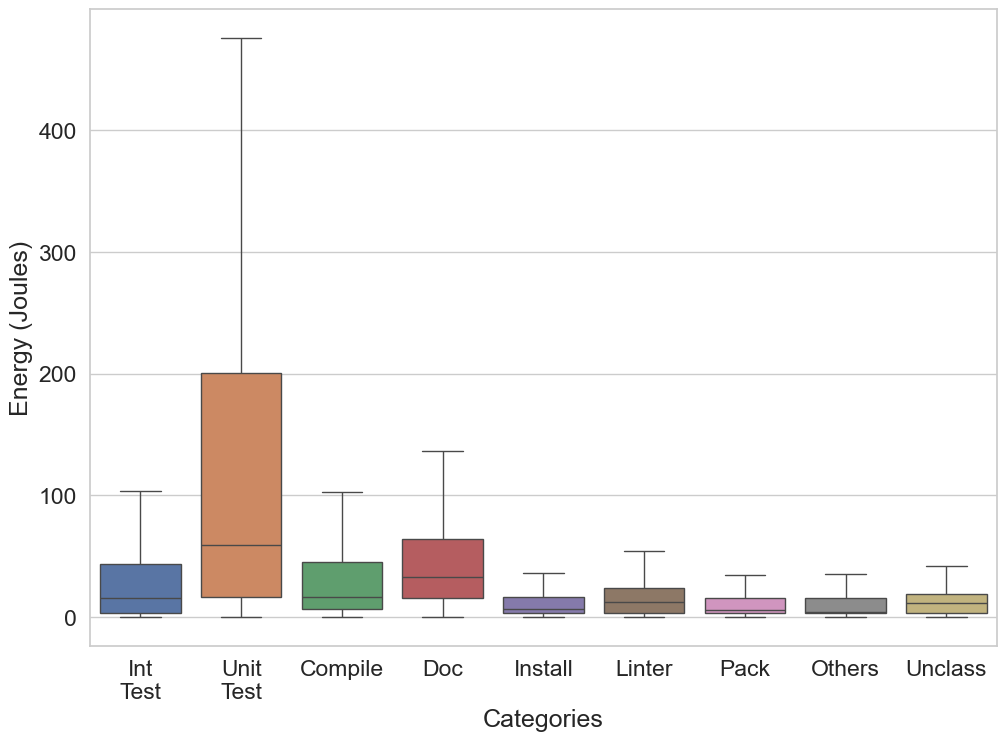

In [64]:
import seaborn as sns

energy_plot = {}
for key, value in tasks_energy_category['all'].items():
    new_key = categories_short[key].replace(" ", "\n")
    energy_plot[new_key] = value

sns.set_theme(style='whitegrid',font_scale=1.5, rc={'figure.figsize':(11.7,8.27)})

g = sns.boxplot(data = energy_plot, showfliers=False)#, log_scale=10)
g.set_xlabel('Categories')
g.set_ylabel('Energy (Joules)')
file_name="boxplot-energy-cat-maven.png"
plt.savefig(f"{analysis_output}/{file_name}", dpi=900, bbox_inches='tight', facecolor='white')
#g.set_yscale("log")

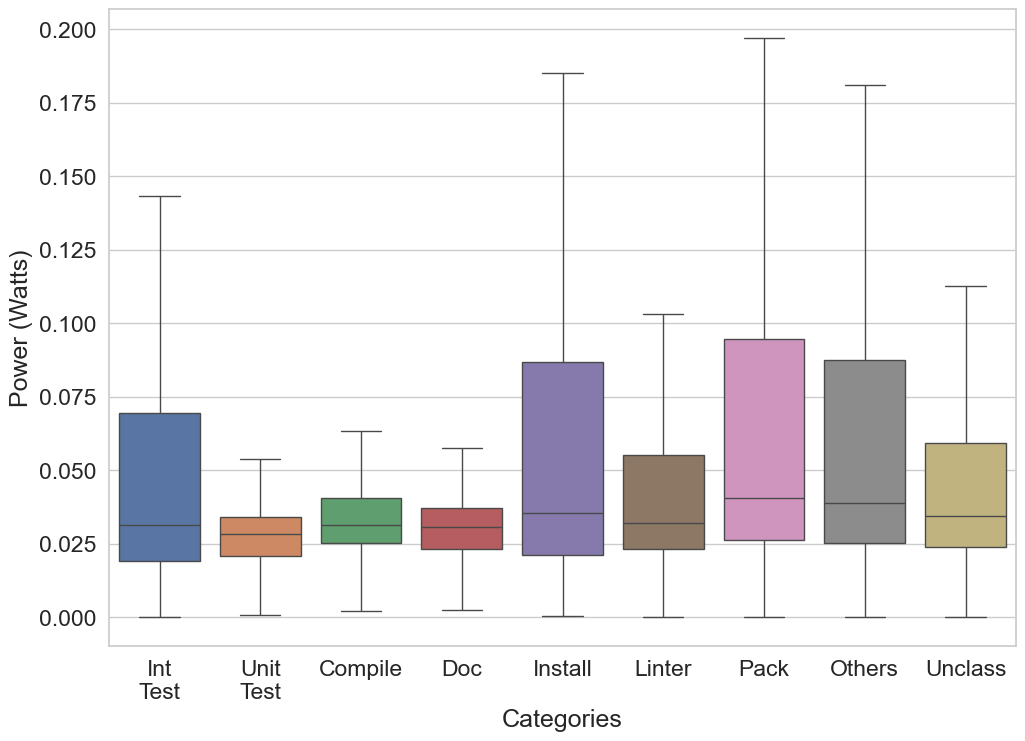

In [65]:
power_plot = {}
for key, value in tasks_power_category['all'].items():
    new_key = categories_short[key].replace(" ", "\n")
    power_plot[new_key] = value

sns.set_theme(style='whitegrid',font_scale=1.5, rc={'figure.figsize':(11.7,8.27)})

g = sns.boxplot(data = power_plot, showfliers=False)#, log_scale=10)
g.set_xlabel('Categories')
g.set_ylabel('Power (Watts)')

file_name="boxplot-power-cat-maven.png"
plt.savefig(f"{analysis_output}/{file_name}", dpi=900, bbox_inches='tight', facecolor='white')
#g.set_yscale("log")